In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants 
%matplotlib inline

Defining the Variables

In [44]:
# Parametersfor the benchmarking
fps=100
num_particles=100
dt=1.0/fps
spatial_resolution=1.0E-8  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
TeV=0.1
T= TeV*constants.e/kb #temperature in Kelvin (0.13 eV converted to Kelvin))
print(T)
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=400 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=2
n_bins=19

1160.4518121550082
0.00023595006124153709


Generating initial x coordinates

In [45]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[1.260e-06 6.300e-06 1.608e-05 4.840e-06 5.380e-06 6.130e-06 1.150e-06
 1.613e-05 1.430e-05 1.307e-05 1.184e-05 2.010e-06 1.743e-05 1.880e-06
 6.170e-06 1.344e-05 1.553e-05 1.720e-05 3.000e-06 4.780e-06 1.509e-05
 1.600e-06 1.743e-05 1.049e-05 6.450e-06 3.060e-06 1.328e-05 9.000e-06
 1.306e-05 4.310e-06 1.550e-05 6.900e-07 1.440e-05 3.760e-06 4.100e-07
 5.700e-07 3.740e-06 1.544e-05 1.627e-05 1.391e-05 1.199e-05 1.711e-05
 5.540e-06 1.250e-06 5.840e-06 1.179e-05 2.930e-06 1.429e-05 5.380e-06
 1.209e-05 1.640e-06 1.296e-05 1.472e-05 1.466e-05 1.940e-06 1.464e-05
 1.352e-05 1.452e-05 1.671e-05 1.382e-05 6.890e-06 1.030e-06 1.136e-05
 2.180e-06 1.030e-06 1.465e-05 1.423e-05 7.800e-07 9.780e-06 6.040e-06
 1.676e-05 1.240e-06 9.900e-06 2.300e-06 1.110e-06 1.007e-05 1.102e-05
 7.390e-06 9.820e-06 5.340e-06 3.330e-06 6.600e-06 6.460e-06 8.360e-06
 1.506e-05 1.479e-05 8.860e-06 1.503e-05 7.430e-06 7.450e-06 1.170e-06
 8.450e-06 9.030e-06 1.440e-05 1.000e-08 1.463e-05 9.290e-06 1.464e-05
 6.740

In [46]:
part_no = np.arange(0,num_particles,dtype = 'int64') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

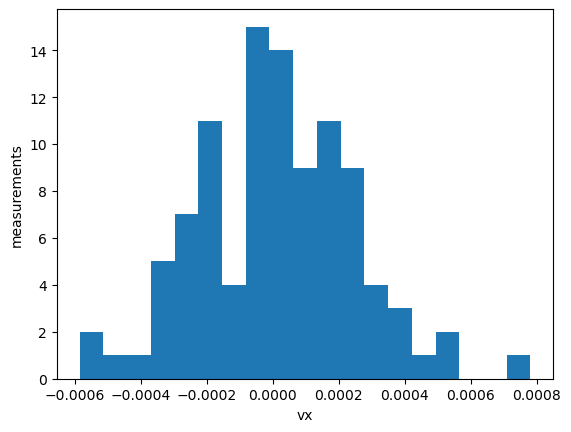

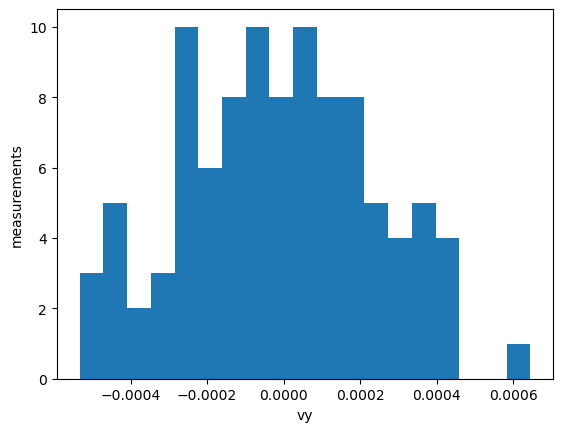

In [47]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

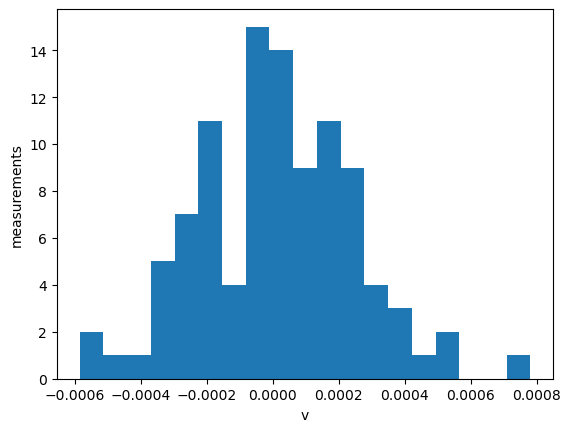

In [48]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[ 7.90e-05  4.30e-05  1.00e-05 -2.97e-04 -3.08e-04 -9.00e-06  2.82e-04
 -1.00e-06  9.90e-05 -4.90e-05]
[ 7.94855785e-05  4.37944733e-05  1.00983808e-05 -2.96593607e-04
 -3.08248932e-04 -9.36730710e-06  2.81997413e-04 -4.62123707e-07
  9.84710700e-05 -4.87579986e-05]
3.3471629877173176e-07
0.016616596175478476
1.661659617547848


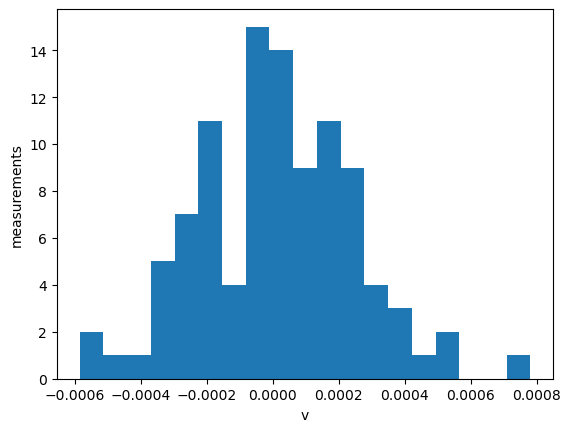

In [49]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [50]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

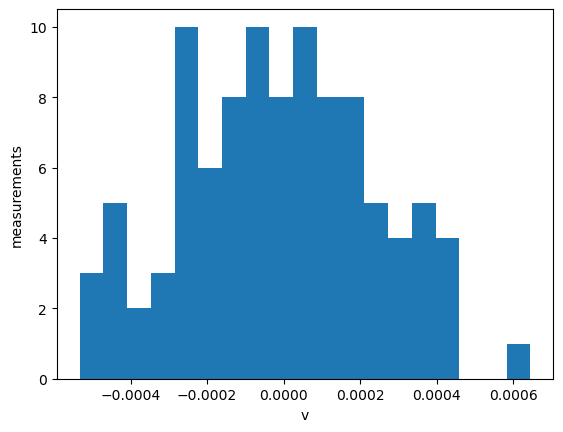

In [51]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [52]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px,final_frame):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [53]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up, final_frame)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,1.301000e-05,3.560000e-06,1,0.000073,-0.000081,0.000074,-0.000081
1,1,9.010000e-06,8.000000e-07,1,-0.000021,-0.000518,-0.000020,-0.000518
2,2,5.900000e-06,3.560000e-06,1,0.000014,0.000047,0.000014,0.000048
3,3,8.790000e-06,2.760000e-06,1,-0.000160,0.000006,-0.000160,0.000007
4,4,7.450000e-06,2.810000e-06,1,-0.000298,0.000362,-0.000298,0.000362
...,...,...,...,...,...,...,...,...
195,95,3.560000e-06,2.610000e-06,2,-0.000121,-0.000014,-0.000121,-0.000013
196,96,2.620000e-06,2.790000e-06,2,0.000230,0.000221,0.000230,0.000221
197,97,1.161000e-05,2.560000e-06,2,-0.000190,-0.000070,-0.000190,-0.000070
198,98,8.900000e-07,3.510000e-06,2,-0.000080,0.000068,-0.000079,0.000069


<BarContainer object of 19 artists>

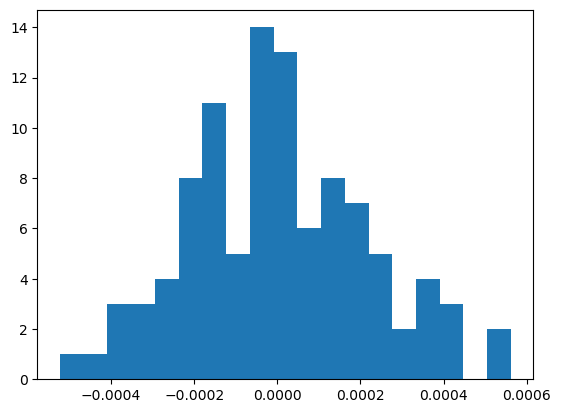

In [54]:
counts_act, bins_act = np.histogram(x_y_df['vx'], bins = n_bins)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

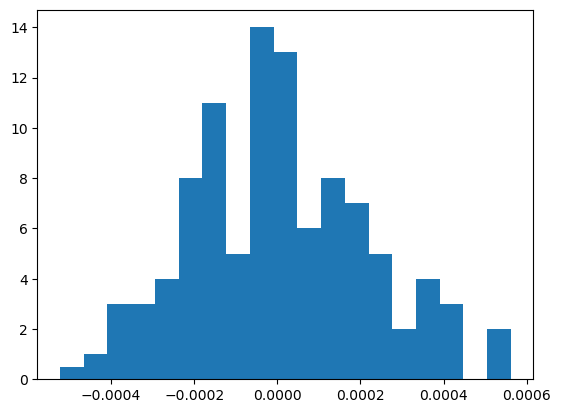

In [55]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

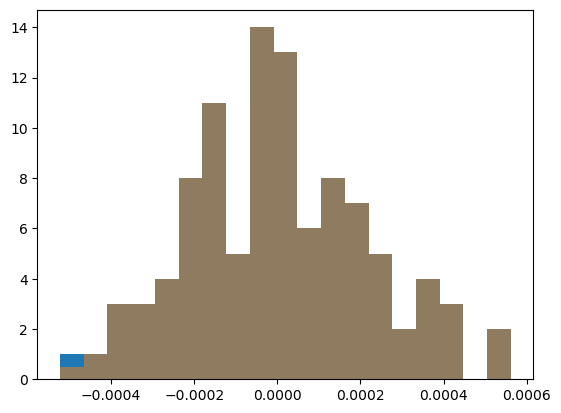

In [56]:
counts, bins = np.histogram(x_y_df['vx'], bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [57]:
vx_restored=x_y_df['vx (restored)']
sample_vx=x_y_df['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.00021602440828526762
0.00021612625152388668
973.6479741885116
972.7305835498988


Function to get the discrepancies

In [58]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [59]:
get_percent_discrepancies(vx_restored,sample_vx)

1.5377023184751466

<BarContainer object of 19 artists>

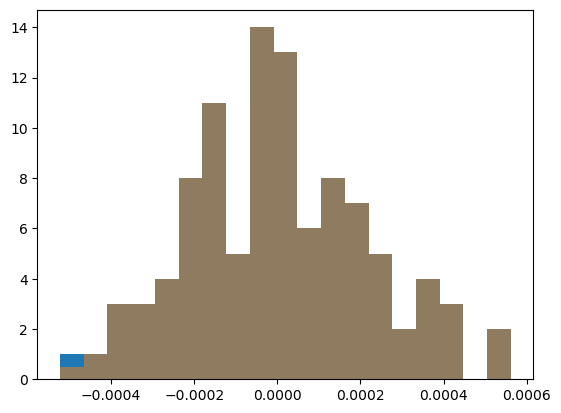

In [60]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up,3)
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)